In [ ]:
import numpy as np
from numpy import sqrt, sin, e, ones, linspace

# This is the function we want to integrate
def f(x):
    return sin(sqrt(100*x))**2
# Integration limits
a = 0.0 
b = 1.0 

# Initial number of slices
N = 1 

# Bound of accuracy
acc = 1*e**(-6)

# Implementing the trapezoidal rule
def integ_atrap(N, a, b):
    h= (b-a)/N # edit this
    x = linspace(a,b,N+1) # number of points is number of slices + 1

    weight = ones(N+1) # number of points is number of slices + 1
    weight[0] = 0
    weight[-1] = 0
    weight[::2] = 0 # summing over odd only
    
    I = 0.5*I0 + h*sum(weight*f(x))
    
    return I, (1/3)*(I-I0)


Ivals, Evals, Nvals = list(), list(), list()
I0, E0 = integ_atrap(f,N,0)[0], 1

while abs(E0) > acc:
    
    N *= 2
    I0, E0 = integ_atrap(f,N,I0)
    Ivals.append(I0)
    Evals.append(E0)
    Nvals.append(N)

hz = ones(len(Nvals))*1e-6

In [ ]:
from __future__ import division # python 2 compat
# "structured" adaptive version, translated from Racket
def _quad_simpsons_mem(f, a, fa, b, fb):
    """Evaluates the Simpson's Rule, also returning m and f(m) to reuse"""
    m = (a + b) / 2
    fm = f(m)
    return (m, fm, abs(b - a) / 6 * (fa + 4 * fm + fb))

def _quad_asr(f, a, fa, b, fb, eps, whole, m, fm):
    """
    Efficient recursive implementation of adaptive Simpson's rule.
    Function values at the start, middle, end of the intervals are retained.
    """
    lm, flm, left  = _quad_simpsons_mem(f, a, fa, m, fm)
    rm, frm, right = _quad_simpsons_mem(f, m, fm, b, fb)
    delta = left + right - whole
    if abs(delta) <= 15 * eps:
        return left + right + delta / 15
    return _quad_asr(f, a, fa, m, fm, eps/2, left , lm, flm) +\
           _quad_asr(f, m, fm, b, fb, eps/2, right, rm, frm)

def quad_asr(f, a, b, eps):
    """Integrate f from a to b using Adaptive Simpson's Rule with max error of eps."""
    fa, fb = f(a), f(b)
    m, fm, whole = _quad_simpsons_mem(f, a, fa, b, fb)
    return _quad_asr(f, a, fa, b, fb, eps, whole, m, fm)

from math import sin
print(quad_asr(sin, 0, 1, 1e-10))

In [ ]:
from numpy import array,empty
# Representing any size of a matrix
N = len(b) 

# Applying gaussian elimination to normalize the matrix
for m in range(N):

    # Dividing by the diagonal element 
    div = A[m,m]
    A[m,:] /= div
    b[m] /= div

    # Subracting a multiple of the row from the lower rows 
    for i in range(m+1,N):
        mult = A[i,m]
        A [i,:] -= mult*A[m,:] 
        b[i] -= mult*b[m]
        
# Backsubstitution
x = empty(N,float)
for m in range(N-1,-1,-1):
    x[m] = b[m]
    for i in range(m+1,N):
        x [m] -= A[m, i] * x[i] 

print(x)

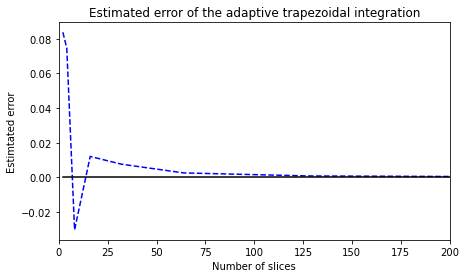

An accuracy of 1e-6 is reached at the number of slices N = 65536


In [5]:
from numpy import linspace, ones, sin, sqrt
import matplotlib.pyplot as plt
a = 0 # integration lower bound
b = 1 # integration upper bound
N = 1 # intial number of integration slices
e = 1e-6 # accuracy bound

def f(x):
    return (sin(sqrt(100*x)))**2

def trapezoid_adapt(f,N,I0):
    h = (b-a)/(N)
    x = linspace(a,b,N+1) # number of points is number of slices + 1
    
    weight = ones(N+1) # number of points is number of slices + 1
    weight[0] = 0
    weight[-1] = 0
    weight[::2] = 0 # summing over odd only
    
    I = 0.5*I0 + h*sum(weight*f(x))
    
    return I, (1/3)*(I-I0)


Ivals, Evals, Nvals = list(), list(), list()
I0, E0 = trapezoid_adapt(f,N,0)[0], 1

while abs(E0) > e:
    
    N *= 2
    I0, E0 = trapezoid_adapt(f,N,I0)
    Ivals.append(I0)
    Evals.append(E0)
    Nvals.append(N)

hz = ones(len(Nvals))*1e-6
plt.figure(figsize=(7,4))
plt.title("Estimated error of the adaptive trapezoidal integration")
plt.ylabel("Estimtated error")
plt.xlabel("Number of slices")
plt.plot(Nvals,Evals,'b--')
plt.plot(Nvals,hz,'k')
plt.xlim(0,200)
plt.show()

print(f"An accuracy of 1e-6 is reached at the number of slices N = {N}")

In [6]:
def trapezoid(f,N):
    """
    Regular Trapezoidal Rule
    """
    h = (b-a)/(N)
    x = linspace(a,b,N+1) # number of points is number of slices + 1
    weight = ones(N+1) # number of points is number of slices + 1
    weight[0] = 0.5
    weight[-1] = 0.5
    
    return h*sum(weight*f(x))

I1 = trapezoid(f,1)
R0 = list()
R0.append(I1)
error = 1
h = (b-a)/(N)

def romberg(R0,m_max):
    
    R = list()
    error = 1.0
    
    for m in range(m_max):
        
        m = int(m)
        if m == 0: 
            val = trapezoid(f,m_max)
            error = (1/3)*(val-R0[0])
        else:
            num = 1/(4**m-1)*(R[m-1]-R0[m-1])
            val = R[m-1]+num
            error = num + h**(2*m+2)
            
        R.append(val)
    
    return R, error

i = 1
print(f"Slice {i}: {R0}\n")
while abs(error) > e:
    
    i += 1 
    R0, error = romberg(R0,i)
    print(f"Slice {i}: {R0}\n")

print(f"The integration achieves an accuracy of 1e-6 for the number of slices N = {i}")

Slice 1: [0.14797948454665205]

Slice 2: [0.3252319078064746, 0.38431604889308213]

Slice 3: [0.43079757183944845, 0.4659861265171064, 0.47143079835870805]

Slice 4: [0.5122828507233315, 0.5394446103512924, 0.5443418426069049, 0.5454991607695747]

Slice 5: [0.45902066640404526, 0.4412666049642832, 0.43472140460514924, 0.4329813976527404, 0.43254015152287045]

Slice 6: [0.42216668286887116, 0.40988202169047977, 0.40778971613889287, 0.4073622290203809, 0.40726176169241085, 0.40723705163392554]

Slice 7: [0.4067588542747065, 0.4016229114099849, 0.4010723040579519, 0.40096567846936554, 0.4009405939574008, 0.40093441490780646, 0.40093287580237885]

Slice 8: [0.40299744847824825, 0.4017436465460955, 0.40175169555516954, 0.40176247954718886, 0.40176560425729796, 0.40176641071897917, 0.4017666138925594, 0.4017666647830001]

The integration achieves an accuracy of 1e-6 for the number of slices N = 8


In [ ]:
# Defining Function
def f(x):
    return x**3 - 5*x - 9

# Implementing Secant Method

def secant(x0,x1,e,N):
    print('\n\n*** SECANT METHOD IMPLEMENTATION ***')
    step = 1
    condition = True
    while condition:
        if f(x0) == f(x1):
            print('Divide by zero error!')
            break
        
        x2 = x0 - (x1-x0)*f(x0)/( f(x1) - f(x0) ) 
        print('Iteration-%d, x2 = %0.6f and f(x2) = %0.6f' % (step, x2, f(x2)))
        x0 = x1
        x1 = x2
        step = step + 1
        
        if step > N:
            print('Not Convergent!')
            break
        
        condition = abs(f(x2)) > e
    print('\n Required root is: %0.8f' % x2)


# Input Section
x0 = input('Enter First Guess: ')
x1 = input('Enter Second Guess: ')
e = input('Tolerable Error: ')
N = input('Maximum Step: ')

# Converting x0 and e to float
x0 = float(x0)
x1 = float(x1)
e = float(e)

# Converting N to integer
N = int(N)


#Note: You can combine above three section like this
# x0 = float(input('Enter First Guess: '))
# x1 = float(input('Enter Second Guess: '))
# e = float(input('Tolerable Error: '))
# N = int(input('Maximum Step: '))

# Starting Secant Method
secant(x0,x1,e,N)

In [ ]:
# Lagrange Interpolation

# Importing NumPy Library
import numpy as np

# Reading number of unknowns
n = int(input('Enter number of data points: '))

# Making numpy array of n & n x n size and initializing 
# to zero for storing x and y value along with differences of y
x = np.zeros((n))
y = np.zeros((n))


# Reading data points
print('Enter data for x and y: ')
for i in range(n):
    x[i] = float(input( 'x['+str(i)+']='))
    y[i] = float(input( 'y['+str(i)+']='))


# Reading interpolation point
xp = float(input('Enter interpolation point: '))

# Set interpolated value initially to zero
yp = 0

# Implementing Lagrange Interpolation
for i in range(n):
    
    p = 1
    
    for j in range(n):
        if i != j:
            p = p * (xp - x[j])/(x[i] - x[j])
    
    yp = yp + p * y[i]    

# Displaying output
print('Interpolated value at %.3f is %.3f.' % (xp, yp))

In [ ]:
# Importing the necessary function
from math import exp
import numpy as np 

# Defining the given c
c = np.array([0, 1, 2, 3])
x_val = np.zeros(len(c))

# Performing the iteration
for i in np.arange(len(c)):
    for k in range(1):
        x_val[i] = 1 - exp(-c[i]*x) 
        print(c[i],x_val[i])

In [ ]:
# Loading the pitch.txt file
y = loadtxt("pitch.txt") 
c = dft(y)

# Plotting the values
plt.plot(abs(c), color = 'steelblue', linewidth = 2, alpha=0.8)
plt.title("Fourier Transform of a Modulated Sine Wave")
plt.xlim(0,500)
plt.show()

In [ ]:
from numpy.fft import rfft

def f(n): 
    return sin(pi*n/N)*sin(20*pi*n/N)

results = []
xrange = linspace(0, 1, N)

for i in range(0, N, 1): 
    results.append(f(i))
    
amp = rfft(results)

# Plotting the amplitudes
plt.plot(abs(amp))

# Customizing the plot
plt.title("Fourier Transform of a Modulated Sine Wave")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.show()